# Hyperparameters and model selection statistic

Paper plot using data generated by the hvblock_hyperparameter_model_selection.ipynb notebook

In [1]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd
import arx.experiments as ex

In [2]:
bydim = pd.read_csv('../results/1-hard-by-dimension.csv')
byhalo = pd.read_csv('../results/1-hard-by-halo.csv')

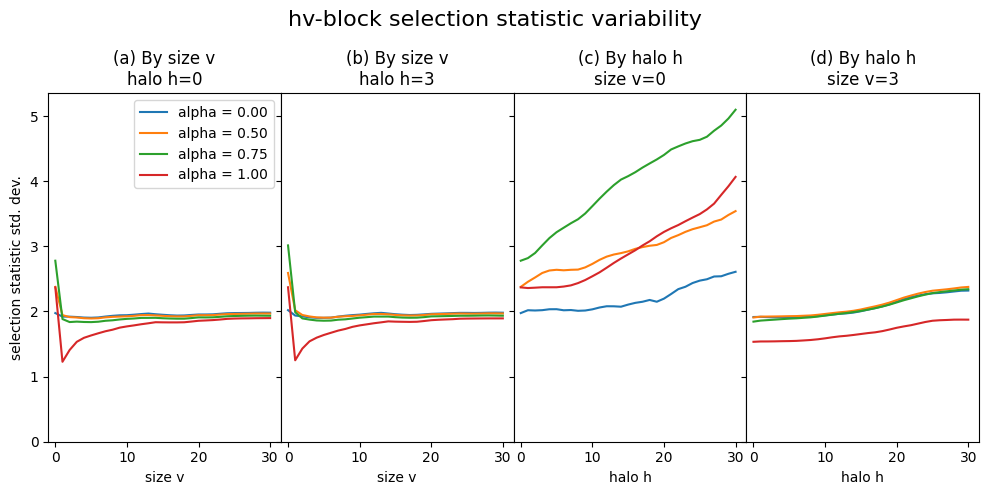

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5), sharey=True)

i = 0
for h, ax in zip([0, 3], axes[:2]):
    for j, alpha in enumerate(ex.ALPHA_SM):
        sel = (bydim.alpha == alpha) & (bydim.h == h)
        v = bydim[sel].v
        std = bydim[sel].cv_std
        ax.plot(v, std)
        ax.set_xlabel("size v")
        ax.set_title(f"({chr(ord('a')+i)}) By size v\nhalo h={h}")
        ax.set_xlim(xmin=-1)
    i += 1

for v, ax in zip([0, 3], axes[2:]):
    for j, alpha in enumerate(ex.ALPHA_SM):
        sel = (byhalo.alpha == alpha) & (byhalo.v == v)
        ax.plot(byhalo[sel].h, byhalo[sel].cv_std)
        ax.set_xlabel("halo h")
        ax.set_title(f"({chr(ord('a')+i)}) By halo h\nsize v={v}")
        ax.set_xlim(xmin=-1)
    i += 1

axes[0].legend([f"alpha = {alpha:.2f}" for alpha in ex.ALPHA_SM])
axes[0].set_ylabel("selection statistic std. dev.")
axes[0].set_ylim(ymin=0, ymax=max(bydim.cv_std.max(), byhalo.cv_std.max())*1.05)

fig.suptitle("hv-block selection statistic variability", fontsize=16)
fig.tight_layout()

fig.subplots_adjust(wspace=0, hspace=0)

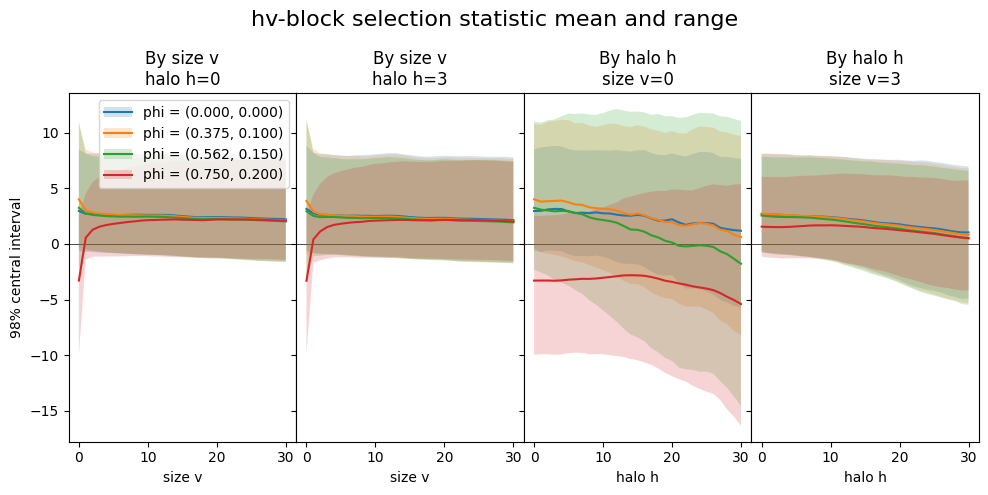

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5), sharey=True)

handles = []
for h, ax in zip([0, 3], axes[:2]):
    for j, alpha in enumerate(ex.ALPHA_SM):
        label = f"phi = ({0.75*alpha}, {0.2*alpha})"
        sel = (bydim.alpha == alpha) & (bydim.h == h)
        v = bydim[sel].v
        pl = ax.plot(v, bydim[sel].cv_mean, label=label)
        fi = ax.fill_between(v, bydim[sel].cv_lower_q, bydim[sel].cv_upper_q, alpha=0.2, label=label)
        fi2 = ax.fill(np.NaN, np.NaN, alpha=0.2, color=fi.get_facecolor())
        handles.append((pl[0], fi2[0]))
        ax.set_title(f"By size v\nhalo h={h}")
        ax.set_xlabel("size v")

axes[0].legend(handles, [f"phi = ({0.75*alpha:.3f}, {0.2*alpha:.3f})" for alpha in ex.ALPHA_SM])
axes[0].set_ylabel("98% central interval")

handles = []
for v, ax in zip([0, 3], axes[2:]):
    for j, alpha in enumerate(ex.ALPHA_SM):
        label = f"phi = ({0.75*alpha}, {0.2*alpha})"
        sel = (byhalo.alpha == alpha) & (byhalo.v == v)
        h = byhalo[sel].h
        cv_mean = byhalo[sel].cv_mean
        cv_std = byhalo[sel].cv_std
        cv_min = byhalo[sel].cv_lower_q
        cv_max = byhalo[sel].cv_upper_q
        pl = ax.plot(h, cv_mean, label=label)
        fi = ax.fill_between(h, cv_min, cv_max, alpha=0.2, label=label)
        fi2 = ax.fill(np.NaN, np.NaN, alpha=0.2, linewidth=0, color=fi.get_facecolor())
        handles.append((pl[0], fi2[0]))
        ax.set_title(f"By halo h\nsize v={v}")
        ax.set_xlabel("halo h")
axes[0].legend(handles, [f"phi = ({0.75*alpha:.3f}, {0.2*alpha:.3f})" for alpha in ex.ALPHA_SM])

for ax in axes:
    ax.axhline(0, color="k", linestyle="-", linewidth=0.5, zorder=-100)

fig.suptitle("hv-block selection statistic mean and range", fontsize=16)
fig.tight_layout()

plt.subplots_adjust(wspace=0, hspace=0)


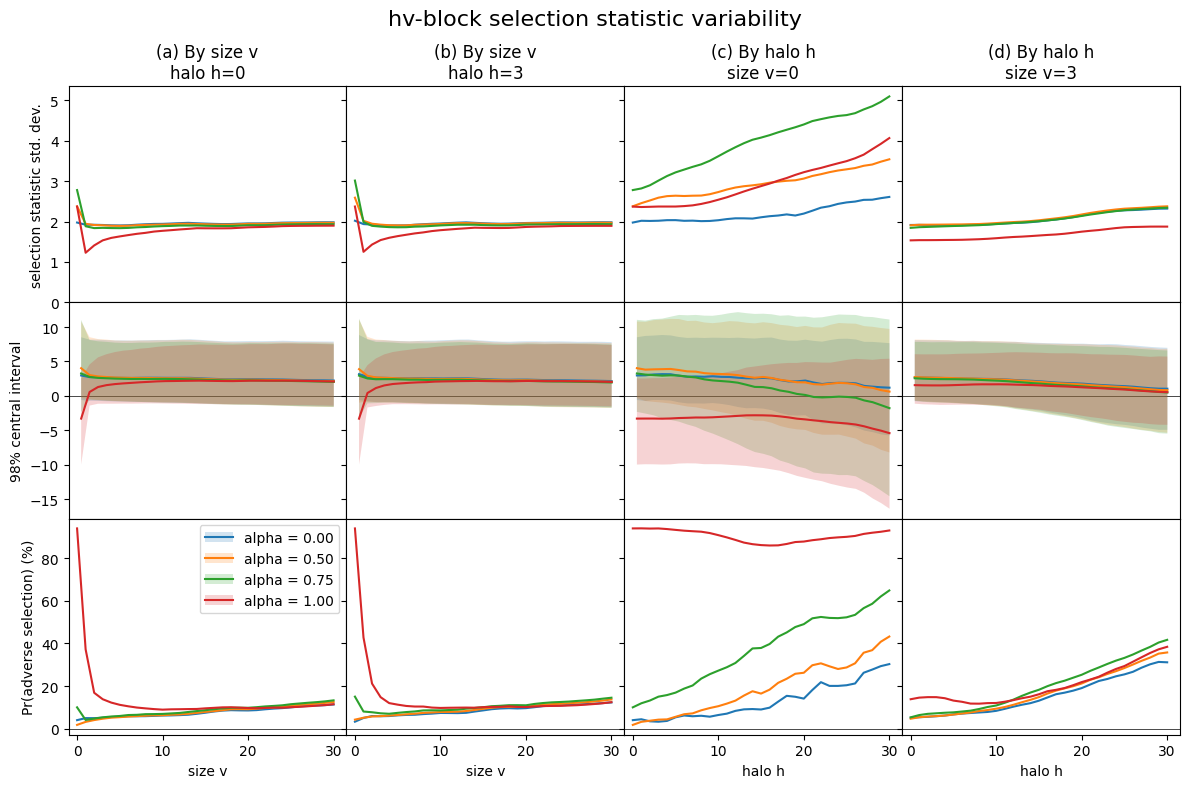

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8), sharey='row')

# **** top row ****

i = 0
for h, ax in zip([0, 3], axes[0, :2]):
    for j, alpha in enumerate(ex.ALPHA_SM):
        sel = (bydim.alpha == alpha) & (bydim.h == h)
        v = bydim[sel].v
        std = bydim[sel].cv_std
        ax.plot(v, std)
        ax.set_title(f"({chr(ord('a')+i)}) By size v\nhalo h={h}")
        ax.set_xlim(xmin=-1)
    i += 1

for v, ax in zip([0, 3], axes[0, 2:]):
    for j, alpha in enumerate(ex.ALPHA_SM):
        sel = (byhalo.alpha == alpha) & (byhalo.v == v)
        ax.plot(byhalo[sel].h, byhalo[sel].cv_std)
        ax.set_title(f"({chr(ord('a')+i)}) By halo h\nsize v={v}")
        ax.set_xlim(xmin=-1)
    i += 1

# **** second row ****

handles = []
for h, ax in zip([0, 3], axes[1, :2]):
    for j, alpha in enumerate(ex.ALPHA_SM):
        label = f"phi = ({0.75*alpha}, {0.2*alpha})"
        sel = (bydim.alpha == alpha) & (bydim.h == h)
        v = bydim[sel].v
        pl = ax.plot(v, bydim[sel].cv_mean, label=label)
        fi = ax.fill_between(v, bydim[sel].cv_lower_q, bydim[sel].cv_upper_q, alpha=0.2, label=label)
        fi2 = ax.fill(np.NaN, np.NaN, alpha=0.2, color=fi.get_facecolor())
        handles.append((pl[0], fi2[0]))
        # ax.set_xlabel("size v")

handles = []
for v, ax in zip([0, 3], axes[1, 2:]):
    for j, alpha in enumerate(ex.ALPHA_SM):
        label = f"phi = ({0.75*alpha}, {0.2*alpha})"
        sel = (byhalo.alpha == alpha) & (byhalo.v == v)
        h = byhalo[sel].h
        cv_mean = byhalo[sel].cv_mean
        cv_std = byhalo[sel].cv_std
        cv_min = byhalo[sel].cv_lower_q
        cv_max = byhalo[sel].cv_upper_q
        pl = ax.plot(h, cv_mean, label=label)
        fi = ax.fill_between(h, cv_min, cv_max, alpha=0.2, label=label)
        fi2 = ax.fill(np.NaN, np.NaN, alpha=0.2, linewidth=0, color=fi.get_facecolor())
        handles.append((pl[0], fi2[0]))
        # ax.set_xlabel("halo h")

# **** third row ****

for h, ax in zip([0, 3], axes[2, :2]):
    for j, alpha in enumerate(ex.ALPHA_SM):
        sel = (bydim.alpha == alpha) & (bydim.h == h)
        ax.plot(bydim[sel].v, 100. * bydim[sel].cv_negshare)
        ax.set_xlim(xmin=-1)
        ax.set_xlabel('size v')

for v, ax in zip([0, 3], axes[2, 2:]):
    for j, alpha in enumerate(ex.ALPHA_SM):
        sel = (byhalo.alpha == alpha) & (byhalo.v == v)
        ax.plot(byhalo[sel].h, 100. * byhalo[sel].cv_negshare)
        ax.set_xlim(xmin=-1)
        ax.set_xlabel('halo h')

#axes[1,0].legend(handles, [f"phi = ({0.75*alpha:.3f}, {0.2*alpha:.3f})" for alpha in ex.ALPHA_SM])
# axes[0,0].legend([f"alpha = {alpha:.2f}" for alpha in ex.ALPHA_SM])
axes[1,0].set_ylabel("98% central interval")
axes[0,0].set_ylabel("selection statistic std. dev.")
axes[2,0].set_ylabel("Pr(adverse selection) (%)")

axes[0,0].set_ylim(ymin=0, ymax=max(bydim.cv_std.max(), byhalo.cv_std.max())*1.05)

axes[2,0].legend(handles, [f"alpha = {alpha:.2f}" for alpha in ex.ALPHA_SM])

for ax in axes.ravel():
    ax.axhline(0, color="k", linestyle="-", linewidth=0.5, zorder=-100)

fig.suptitle("hv-block selection statistic variability", fontsize=16)
fig.tight_layout()

fig.subplots_adjust(wspace=0, hspace=0)

# fig.savefig('../../paper/figures/hv-hyperparameters.pdf')

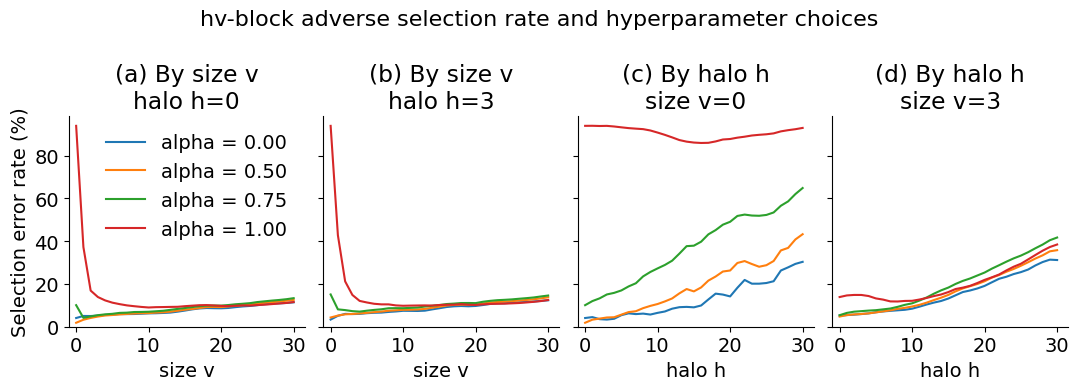

In [6]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(11, 4), sharey='row')

i = 0
for h, ax in zip([0, 3], axes[:2]):
    for j, alpha in enumerate(ex.ALPHA_SM):
        sel = (bydim.alpha == alpha) & (bydim.h == h)
        ax.plot(bydim[sel].v, 100. * bydim[sel].cv_negshare)
        ax.set_title(f"({chr(ord('a')+i)}) By size v\nhalo h={h}")
        ax.set_xlim(xmin=-1)
        ax.set_xlabel('size v')
    i += 1

for v, ax in zip([0, 3], axes[2:]):
    for j, alpha in enumerate(ex.ALPHA_SM):
        sel = (byhalo.alpha == alpha) & (byhalo.v == v)
        ax.plot(byhalo[sel].h, 100. * byhalo[sel].cv_negshare)
        ax.set_title(f"({chr(ord('a')+i)}) By halo h\nsize v={v}")
        ax.set_xlim(xmin=-1)
        ax.set_xlabel('halo h')
    i += 1

for ax in axes.ravel():
    ax.spines[['top','right']].set_visible(False)

#axes[1,0].legend(handles, [f"phi = ({0.75*alpha:.3f}, {0.2*alpha:.3f})" for alpha in ex.ALPHA_SM])
axes[0].legend([f"alpha = {alpha:.2f}" for alpha in ex.ALPHA_SM], frameon=False)
axes[0].set_ylabel("Selection error rate (%)")

#axes[2,0].legend(handles, [f"alpha = {alpha:.2f}" for alpha in ex.ALPHA_SM])

for ax in axes:
    ax.axhline(0, color="k", linestyle="-", linewidth=0.5, zorder=-100)
    ax.set_ylim(bottom=0)

fig.suptitle("hv-block adverse selection rate and hyperparameter choices", fontsize=16)
fig.tight_layout()

fig.subplots_adjust(wspace=0.08, hspace=0)

fig.savefig('../../paper/figures/hv-hyper-loss.pdf')